# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.107357e+01     6.100812e+00
 * time: 0.004591941833496094
     1     2.787078e+01     4.512136e+00
 * time: 0.013741016387939453
     2     2.110145e+01     5.048140e+00
 * time: 0.03499197959899902
     3     1.313255e+01     1.721852e+00
 * time: 0.05843091011047363
     4     1.224848e+01     2.595335e+00
 * time: 0.07394194602966309
     5     1.144150e+01     1.654562e+00
 * time: 0.08998680114746094
     6     1.005446e+01     1.660878e+00
 * time: 0.10629987716674805
     7     9.794263e+00     1.352303e+00
 * time: 0.12260794639587402
     8     9.320798e+00     1.185642e+00
 * time: 0.13895082473754883
     9     8.971580e+00     1.167476e+00
 * time: 0.15529680252075195
    10     8.700340e+00     7.012516e-01
 * time: 0.24235796928405762
    11     8.536628e+00     5.195972e-01
 * time: 0.2573659420013428
    12     8.453630e+00     4.762719e-01
 * time: 0.268704891204834
    13     8.430505e+00     3.403092e-01
 * time: 

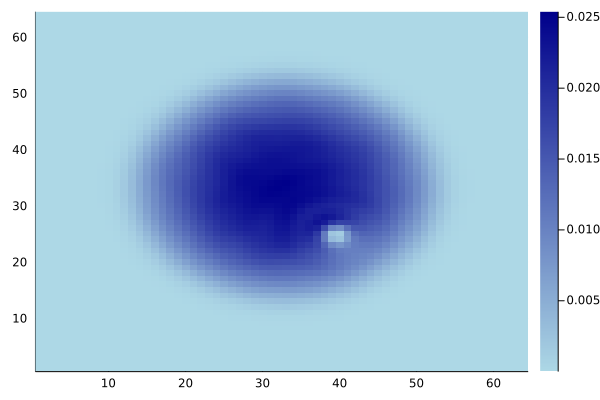

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)